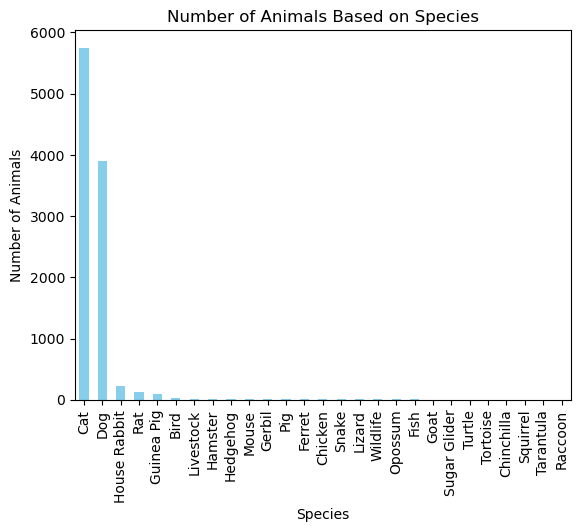

Accuracy: 0.8259067357512954
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75       782
           1       0.80      0.95      0.87      1148

    accuracy                           0.83      1930
   macro avg       0.84      0.80      0.81      1930
weighted avg       0.84      0.83      0.82      1930



/var/folders/35/gptj7yqx5wz56j492lzt6qj00000gn/T/ipykernel_17829/2931944513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['gender'] = model_data['gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [4]:
%run proj3_data_preprocess.ipynb

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## SVM:

In [14]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_rep = classification_report(y_test, svm_predictions)
print(f'Support Vector Machine Accuracy: {svm_accuracy}')
print('Support Vector Machine Classification Report:\n', svm_classification_rep)

Support Vector Machine Accuracy: 0.8253886010362694
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       782
           1       0.79      0.95      0.87      1148

    accuracy                           0.83      1930
   macro avg       0.85      0.80      0.81      1930
weighted avg       0.84      0.83      0.82      1930



## Decision Trees: 

In [15]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_rep = classification_report(y_test, decision_tree_predictions)
print(f'Decision Trees Accuracy: {decision_tree_accuracy}')
print('Decision Trees Classification Report:\n', decision_tree_classification_rep)

Decision Trees Accuracy: 0.8347150259067357
Decision Trees Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       782
           1       0.85      0.88      0.86      1148

    accuracy                           0.83      1930
   macro avg       0.83      0.82      0.83      1930
weighted avg       0.83      0.83      0.83      1930



## Random Forests:

In [16]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_classification_rep = classification_report(y_test, random_forest_predictions)
print(f'Random Forests Accuracy: {random_forest_accuracy}')
print('Random Forests Classification Report:\n', random_forest_classification_rep)

Random Forests Accuracy: 0.8404145077720208
Random Forests Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       782
           1       0.85      0.89      0.87      1148

    accuracy                           0.84      1930
   macro avg       0.84      0.83      0.83      1930
weighted avg       0.84      0.84      0.84      1930



## Neural Nets:

In [18]:
random_seeds = [42, 123, 567, 789, 999]

neural_network_accuracies = []

for seed in random_seeds:
    neural_network_model = MLPClassifier(random_state=seed)
    neural_network_model.fit(X_train_scaled, y_train)
    neural_network_predictions = neural_network_model.predict(X_test_scaled)

    neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)
    neural_network_accuracies.append(neural_network_accuracy)

average_neural_network_accuracy = np.mean(neural_network_accuracies)
print(f'Neural Networks Average Accuracy: {average_neural_network_accuracy}')

Neural Networks Average Accuracy: 0.8374093264248705


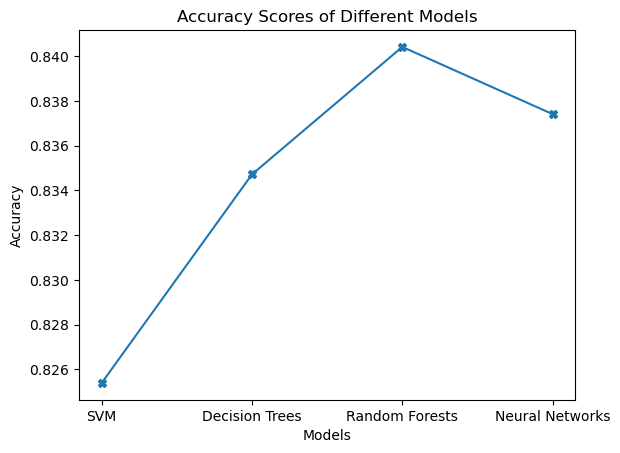

In [23]:
models = ['SVM', 'Decision Trees', 'Random Forests', 'Neural Networks']

accuracy_scores = [svm_accuracy, decision_tree_accuracy, random_forest_accuracy, average_neural_network_accuracy]

plt.plot(models, accuracy_scores, marker='X', linestyle='-')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()